In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 对数线性回归

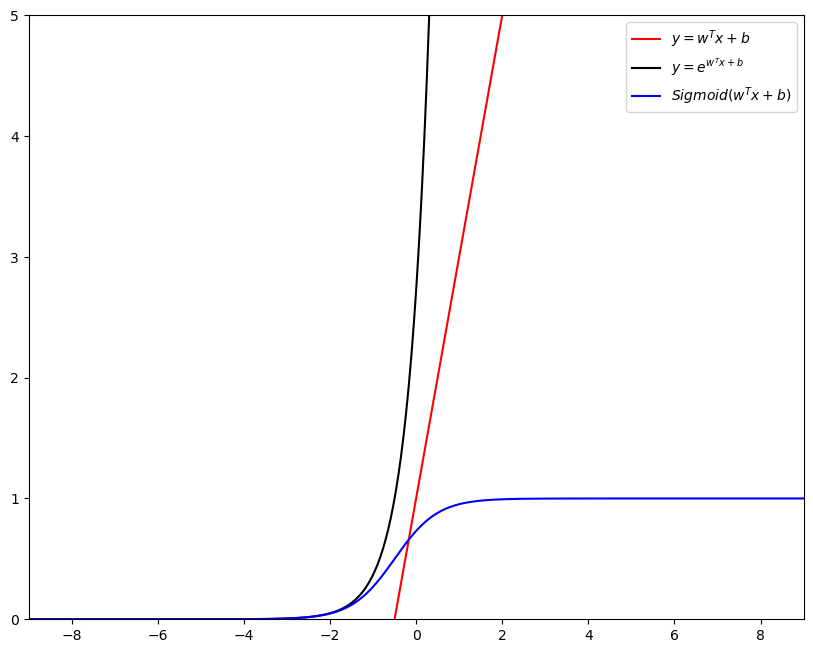

In [2]:
w = 2
b = 1

x = np.linspace(-10,10,1000)
y = w*x+b
plt.figure(figsize=(10,8),dpi=100)
plt.ylim([0,5])
plt.xlim([-9,9])
plt.plot(x,y,'r',label='$y=w^Tx+b$')
plt.plot(x,np.exp(y),'black',label='$y=e^{w^{T}x+b}$')
plt.plot(x,1/(1+np.exp(-y)),'b',label='$Sigmoid(w^Tx+b)$')
plt.legend()
plt.show()

# 监督降维技术：线性判别分析（LDA）

## 生成二维测试数据

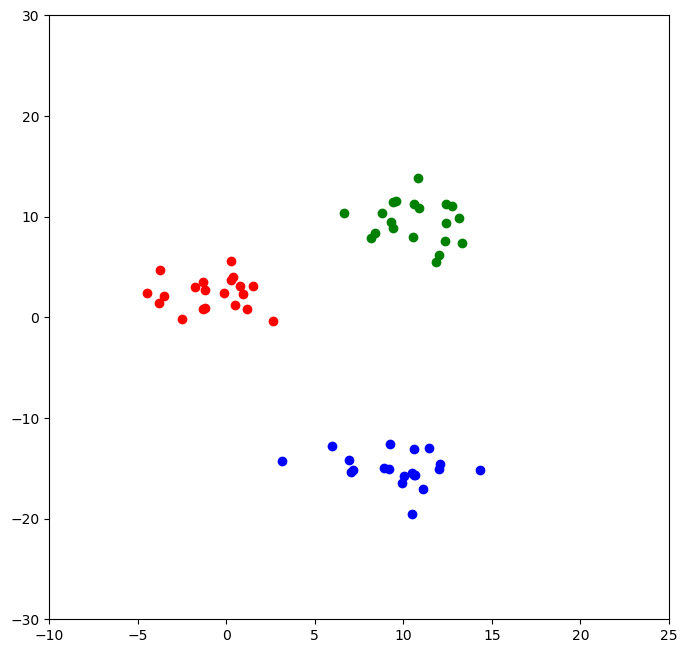

In [3]:
fig = plt.figure(figsize=(8,8),dpi=100)
x1 = np.random.normal([-1,2],[2,2],size=(20,2))
x2 = np.random.normal([10,10],[2,2],size=(20,2))
x3 = np.random.normal([10,-15],[2,2],size=(20,2))
x1 = np.concatenate((x1,np.zeros((len(x1),1))),axis=1)
x2 = np.concatenate((x2,np.ones((len(x2),1))),axis=1)
x3 = np.concatenate((x3,2*np.ones((len(x3),1))),axis=1)
input_data = np.concatenate((x1,x2,x3),axis=0)
plt.xlim([-10,25])
plt.ylim([-30,30])
plt.scatter(x1[:,0],x1[:,1],c='r')
plt.scatter(x2[:,0],x2[:,1],c='g')
plt.scatter(x3[:,0],x3[:,1],c='b')
plt.show()

## Python实现LDA降维

In [4]:
def LDA(inputs, ndim):
    # 获取类别数
    k = len(pd.Series(inputs[:,-1]).value_counts())
    # 获取特征数
    c = inputs.shape[-1]-1
    # 获取每一类的个数
    m = pd.Series(inputs[:,-1]).value_counts().values
    # 获取mu值
    mu_i = np.zeros((k,c))
    mu = np.average(inputs[:,:-1],axis=0).reshape((1,c))
    for i in range(k):
        if i == 0:
            mu_i[i] = np.average(inputs[:m[i],:-1],axis=0).reshape((1,c))
        else:
            mu_i[i] = np.average(inputs[i*m[i]-1:(i+1)*m[i]-1,:-1],axis=0).reshape((1,c))
    # 获取类间散度矩阵
    Sb = np.zeros((c,c))
    for i in range(k):
        Sb += m[i]*np.dot(np.transpose(mu_i[i]-mu), mu_i[i]-mu)
    # 获取类内散度矩阵
    Sw = np.zeros((c,c))
    for i in range(k):
        Sw_i = np.zeros((c,c))
        for j in range(m[i]):
            if i == 0:
                Sw_i += np.dot(np.transpose(inputs[:m[i],:-1]-mu_i[i]),inputs[:m[i],:-1]-mu_i[i])
        Sw += Sw_i
    # 求解
    eig_value, feature_vector = np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
    eig_val_index = np.argsort(eig_value)
    eig_val_index = eig_val_index[:(-ndim-1):-1]
    w = feature_vector[:,eig_val_index]
    return w

In [5]:
w = LDA(input_data, 2)
w

array([[ 0.02722442, -0.99302382],
       [-0.99962935, -0.1179139 ]])

## 效果

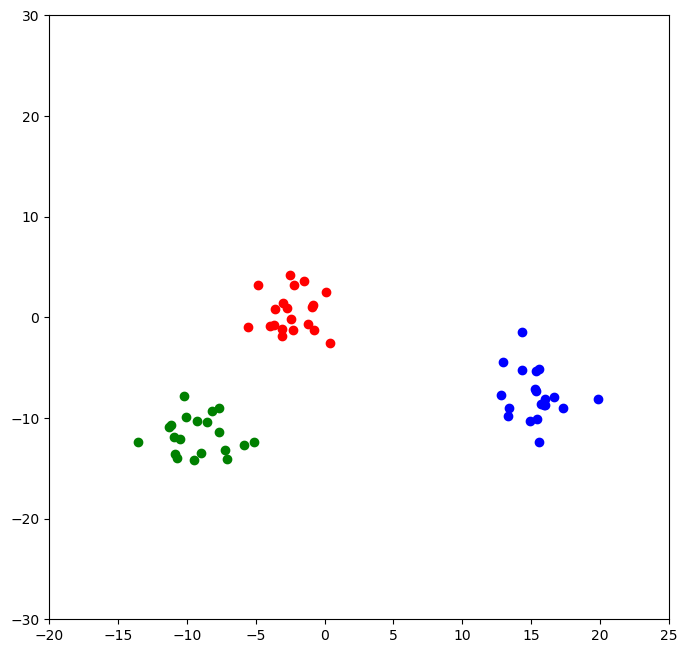

In [6]:
fig = plt.figure(figsize=(8,8),dpi=100)
x1_new = np.dot(input_data[input_data[:,-1]==0][:,:-1],w)
x2_new = np.dot(input_data[input_data[:,-1]==1][:,:-1],w)
x3_new = np.dot(input_data[input_data[:,-1]==2][:,:-1],w)
plt.xlim([-20,25])
plt.ylim([-30,30])
plt.scatter(x1_new[:,0],x1_new[:,1],c='r')
plt.scatter(x2_new[:,0],x2_new[:,1],c='g')
plt.scatter(x3_new[:,0],x3_new[:,1],c='b')
plt.show()

# 应用（鸢尾花数据集iris）

## 导入数据

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target
Y = Y.reshape(len(Y),1)
iris = np.concatenate((X,Y),axis=1)

w_iris3d = LDA(iris,3)
w_iris2d = LDA(iris,2)

## 前三维可视化

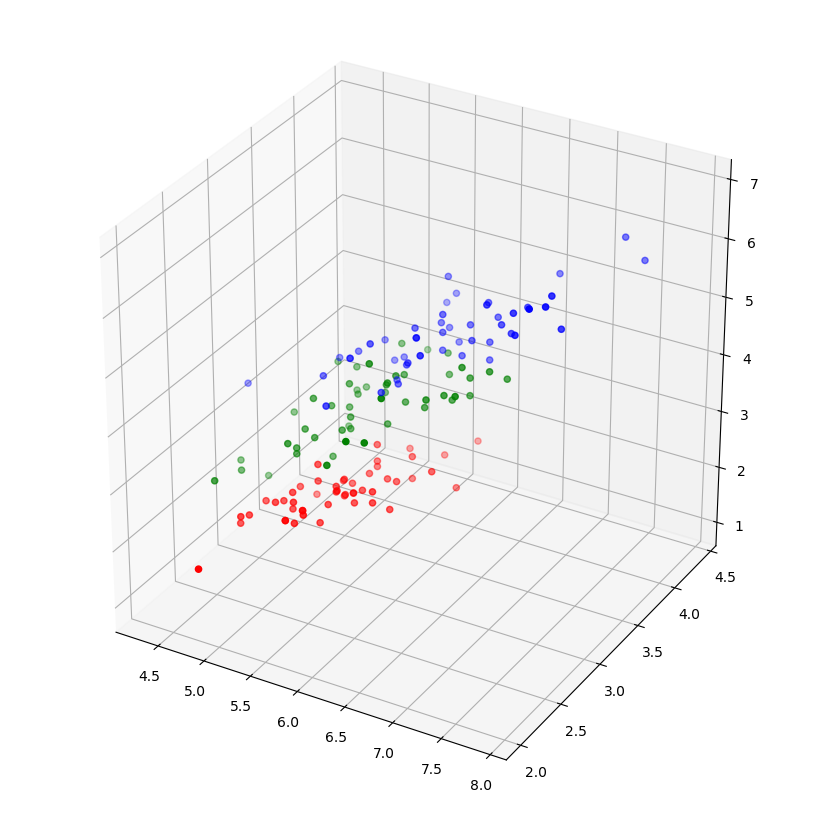

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(8,8),dpi=100)
ax = Axes3D(fig)
ax.scatter(iris[iris[:,-1]==0][:,0], iris[iris[:,-1]==0][:,1], iris[iris[:,-1]==0][:,2],c='r')
ax.scatter(iris[iris[:,-1]==1][:,0], iris[iris[:,-1]==1][:,1], iris[iris[:,-1]==1][:,2],c='g')
ax.scatter(iris[iris[:,-1]==2][:,0], iris[iris[:,-1]==2][:,1], iris[iris[:,-1]==2][:,2],c='b')
plt.show()

## LDA降维后效果

## 原四维降至二维

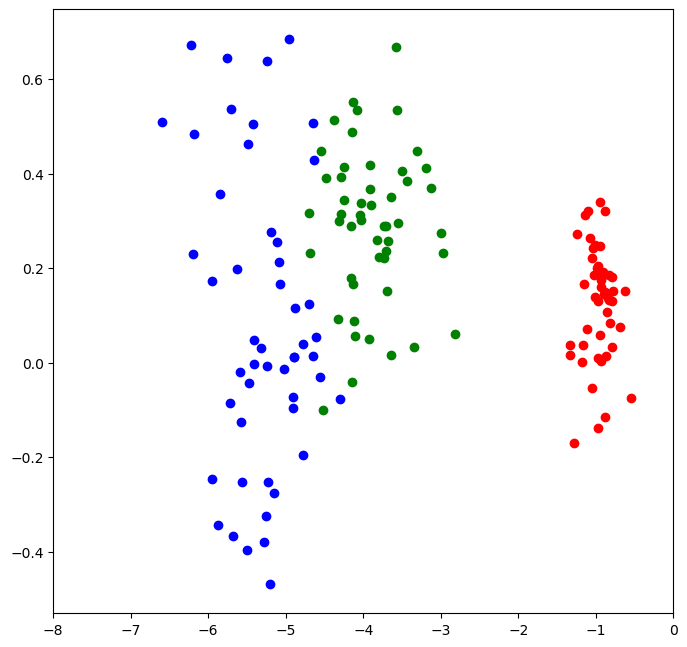

In [9]:
fig = plt.figure(figsize=(8,8),dpi=100)
plt.xlim([-7,0])
plt.xlim([-8,0])
plt.scatter(np.dot(iris[iris[:,-1]==0][:,:-1], w_iris2d)[:,0], np.dot(iris[iris[:,-1]==0][:,:-1], w_iris2d)[:,1],c='r')
plt.scatter(np.dot(iris[iris[:,-1]==1][:,:-1], w_iris2d)[:,0], np.dot(iris[iris[:,-1]==1][:,:-1], w_iris2d)[:,1],c='g')
plt.scatter(np.dot(iris[iris[:,-1]==2][:,:-1], w_iris2d)[:,0], np.dot(iris[iris[:,-1]==2][:,:-1], w_iris2d)[:,1],c='b')
plt.show()

## 原四维降至三维

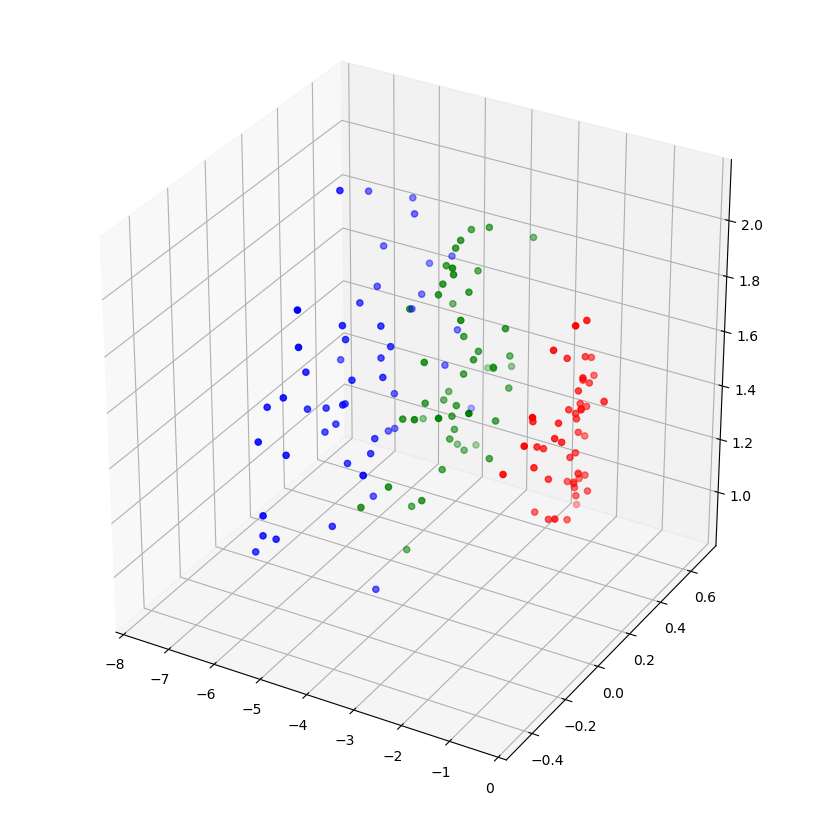

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(8,8),dpi=100)
ax = Axes3D(fig)
plt.xlim([-8,0])
plt.xlim([-8,0])
ax.scatter(np.dot(iris[iris[:,-1]==0][:,:-1], w_iris3d)[:,0], np.dot(iris[iris[:,-1]==0][:,:-1], w_iris3d)[:,1],np.dot(iris[iris[:,-1]==0][:,:-1], w_iris3d)[:,2],c='r')
ax.scatter(np.dot(iris[iris[:,-1]==1][:,:-1], w_iris3d)[:,0], np.dot(iris[iris[:,-1]==1][:,:-1], w_iris3d)[:,1],np.dot(iris[iris[:,-1]==1][:,:-1], w_iris3d)[:,2],c='g')
ax.scatter(np.dot(iris[iris[:,-1]==2][:,:-1], w_iris3d)[:,0], np.dot(iris[iris[:,-1]==2][:,:-1], w_iris3d)[:,1],np.dot(iris[iris[:,-1]==2][:,:-1], w_iris3d)[:,2],c='b')
plt.show()